# 1.Configuration

### A. Importing dependencies

In [98]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import requests
import os
from os.path import join, dirname
from dotenv import load_dotenv

dotenv_path = join('E:/Documents Florian/projects/', '.env')
load_dotenv(dotenv_path)

True

### B. Loading file

In [99]:
file = pd.read_csv('E:/Documents Florian/projects/data_project_bike/dataset.csv', parse_dates=['started_at', 'ended_at'], dtype={'start_station_id': 'str', 'end_station_id': 'str'}, encoding='utf-8-sig').sort_values(by='started_at', ascending=True)
file

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
879593,4612E3DBB1F3088D,classic_bike,2023-01-01 00:00:13,2023-01-01 00:19:55,W 56 St & 10 Ave,6955.01,Harrison St & Hudson St,5400.05,40.768355,-73.988888,40.718710,-74.009001,member
319265,4C882B46547FA011,classic_bike,2023-01-01 00:00:15,2023-01-01 00:35:07,W 106 St & Amsterdam Ave,7634.01,W 106 St & Amsterdam Ave,7634.01,40.800795,-73.966422,40.800836,-73.966449,member
700568,63AF84DBE457A618,classic_bike,2023-01-01 00:00:21,2023-01-01 00:01:14,Grand St & Havemeyer St,5267.08,Grand St & Havemeyer St,5267.08,40.712868,-73.956981,40.712868,-73.956981,casual
131250,D853DABC874C9655,classic_bike,2023-01-01 00:00:29,2023-01-01 00:02:37,Nagle Ave & Ellwood St,8528.05,Nagle Ave & Ellwood St,8528.05,40.860120,-73.928489,40.860120,-73.928489,member
189806,69EE88DD2B84995B,classic_bike,2023-01-01 00:01:07,2023-01-01 00:05:53,S 5 Pl & S 5 St,5125.03,S 5 Pl & S 5 St,5125.03,40.710451,-73.960876,40.710451,-73.960876,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
807736,8E854DE44C21F172,classic_bike,2023-01-31 23:59:35,2023-02-01 00:04:52,E 5 St & Cooper Sq,5712.12,Forsyth St & Grand St,5382.07,40.727660,-73.990935,40.717798,-73.993161,member
188843,E2B5A3C04ECD5B3D,classic_bike,2023-01-31 23:59:40,2023-02-01 00:12:52,Bond St & Bergen St,4404.1,Putnam Ave & Throop Ave,4392.04,40.684910,-73.986166,40.685153,-73.941110,member
466618,30ED15514F95E3EC,electric_bike,2023-01-31 23:59:41,2023-02-01 00:04:53,Hancock St & Bedford Ave,4255.05,Marcus Garvey Blvd & Macon St,4278.03,40.682166,-73.953990,40.682601,-73.938037,member
941075,6138FEF56EF3D257,classic_bike,2023-01-31 23:59:53,2023-02-01 00:08:48,E 91 St & 2 Ave,7286.01,E 106 St & 2 Ave,7482.15,40.781153,-73.949630,40.790586,-73.941958,member


# 2. Data preparation

### A. Checking data types

In [100]:
file.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

### B. Adding columns

In [101]:
# To visualize data based on time, the following columns were added to the dataframe: date, week, day_number, hour, duration

file.insert(4, column='date', value=(file['started_at'].dt.date))
file.insert(5, column='week', value=file['started_at'].dt.isocalendar().week)
file.insert(6, column='day_number', value=file['started_at'].dt.dayofweek +1) # Added '1' so that Monday = 1 and Sunday = 7
file.insert(7, column='hour', value=file['started_at'].dt.hour)
file.insert(8, column='duration', value=(file['ended_at'] - file['started_at']).dt.components['minutes'])

In [102]:
# Duration column was used to categorize each ride based on their duration
# 0-5 minutes
# 5-15 minutes
# >15 minutes

bins = [0, 5, 15, np.inf]
labels = ['0-5 minutes', '5-15 minutes', '>15 minutes']

file.insert(9, column='category', value=pd.cut(file['duration'], bins=bins, labels=labels, right=False))

In [103]:
file

,ride_id,rideable_type,started_at,ended_at,date,week,day_number,hour,duration,category,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
879593,4612E3DBB1F3088D,classic_bike,2023-01-01 00:00:13,2023-01-01 00:19:55,2023-01-01,52,7,0,19,>15 minutes,W 56 St & 10 Ave,6955.01,Harrison St & Hudson St,5400.05,40.768355,-73.988888,40.718710,-74.009001,member
319265,4C882B46547FA011,classic_bike,2023-01-01 00:00:15,2023-01-01 00:35:07,2023-01-01,52,7,0,34,>15 minutes,W 106 St & Amsterdam Ave,7634.01,W 106 St & Amsterdam Ave,7634.01,40.800795,-73.966422,40.800836,-73.966449,member
700568,63AF84DBE457A618,classic_bike,2023-01-01 00:00:21,2023-01-01 00:01:14,2023-01-01,52,7,0,0,0-5 minutes,Grand St & Havemeyer St,5267.08,Grand St & Havemeyer St,5267.08,40.712868,-73.956981,40.712868,-73.956981,casual
131250,D853DABC874C9655,classic_bike,2023-01-01 00:00:29,2023-01-01 00:02:37,2023-01-01,52,7,0,2,0-5 minutes,Nagle Ave & Ellwood St,8528.05,Nagle Ave & Ellwood St,8528.05,40.860120,-73.928489,40.860120,-73.928489,member
189806,69EE88DD2B84995B,classic_bike,2023-01-01 00:01:07,2023-01-01 00:05:53,2023-01-01,52,7,0,4,0-5 minutes,S 5 Pl & S 5 St,5125.03,S 5 Pl & S 5 St,5125.03,40.710451,-73.960876,40.710451,-73.960876,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807736,8E854DE44C21F172,classic_bike,2023-01-31 23:59:35,2023-02-01 00:04:52,2023-01-31,5,2,23,5,5-15 minutes,E 5 St & Cooper Sq,5712.12,Forsyth St & Grand St,5382.07,40.727660,-73.990935,40.717798,-73.993161,member
188843,E2B5A3C04ECD5B3D,classic_bike,2023-01-31 23:59:40,2023-02-01 00:12:52,2023-01-31,5,2,23,13,5-15 minutes,Bond St & Bergen St,4404.1,Putnam Ave & Throop Ave,4392.04,40.684910,-73.986166,40.685153,-73.941110,member
466618,30ED15514F95E3EC,electric_bike,2023-01-31 23:59:41,2023-02-01 00:04:53,2023-01-31,5,2,23,5,5-15 minutes,Hancock St & Bedford Ave,4255.05,Marcus Garvey Blvd & Macon St,4278.03,40.682166,-73.953990,40.682601,-73.938037,member
941075,6138FEF56EF3D257,classic_bike,2023-01-31 23:59:53,2023-02-01 00:08:48,2023-01-31,5,2,23,8,5-15 minutes,E 91 St & 2 Ave,7286.01,E 106 St & 2 Ave,7482.15,40.781153,-73.949630,40.790586,-73.941958,member


# 3. Data visualization

### A. Duration distribution

Creation of a bar chart to visualize the number of rides based on duration

In [104]:
duration_grouping = file.groupby(by=['category'], observed=True).agg(count=('ride_id', 'count')).reset_index()
duration_grouping

,category,count
0,0-5 minutes,284572
1,5-15 minutes,496420
2,>15 minutes,219008


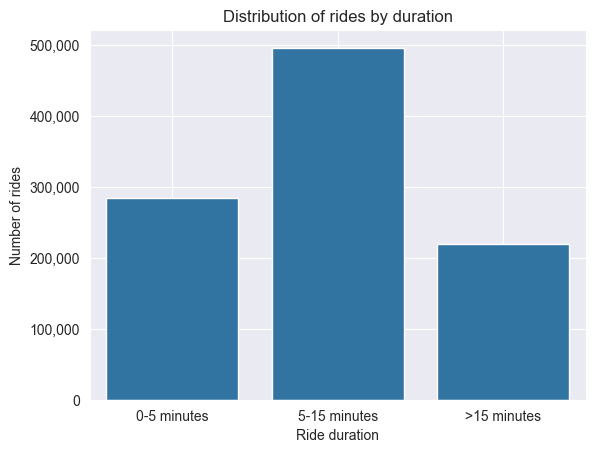

In [105]:
duration_graph = sns.barplot(x=duration_grouping['category'], y=duration_grouping['count'])

plt.xlabel('Ride duration')
plt.ylabel('Number of rides')
plt.title('Distribution of rides by duration')
plt.grid(True)
duration_graph.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}')) # Setting a ',' thousands separator on y axis for better readability 

### B. Hour frame distribution

Creation of a line chart to visualize the average number of ride departures by hour frame

In [106]:
# Retrieving the number of rides for each hour frame, for each day of the month

hour_grouping = file.groupby(by=['hour','date']).agg(count=('ride_id', 'count')).reset_index()
hour_grouping

,hour,date,count
0,0,2023-01-01,582
1,0,2023-01-02,412
2,0,2023-01-03,315
3,0,2023-01-04,351
4,0,2023-01-05,298
...,...,...,...
739,23,2023-01-27,774
740,23,2023-01-28,966
741,23,2023-01-29,458
742,23,2023-01-30,518


<Axes: title={'center': 'Number of ride departures by hour frame'}, xlabel='Hour frame', ylabel='Ride departures'>

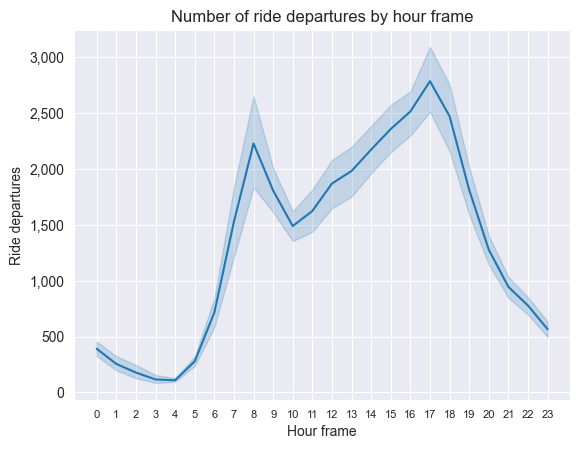

In [107]:
hour_grouping['date'] = pd.to_datetime(hour_grouping['date'])

hour_graph = sns.lineplot(data=hour_grouping, x='hour', y='count', errorbar='ci')
hour_graph.set(xlabel='Hour frame', ylabel='Ride departures')

sns.set_style('darkgrid')
plt.xticks(fontsize=8)
plt.xticks(range(24))
hour_graph.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}')) # Setting a ',' thousands separator on y axis for better readability 
plt.title('Number of ride departures by hour frame')

hour_graph

### C. Weekday distribution

Creation of a bar chart to visualize the number of rides by weekday

In [108]:
# Retrieving the number of rides for each weekday, for each week of the month
# 01/01/2023 is part of week 52 from 2022

weekday_grouping = file.groupby(by=['day_number', 'week']).agg(count=('ride_id', 'count')).reset_index()
weekday_grouping

,day_number,week,count
0,1,1,32262
1,1,2,34445
2,1,3,27524
3,1,4,21593
4,1,5,39168
5,2,1,28706
6,2,2,37390
7,2,3,36087
8,2,4,37730
9,2,5,32143


<Axes: title={'center': 'Distribution of rides by weekday'}, xlabel='Weekday', ylabel='Number of rides'>

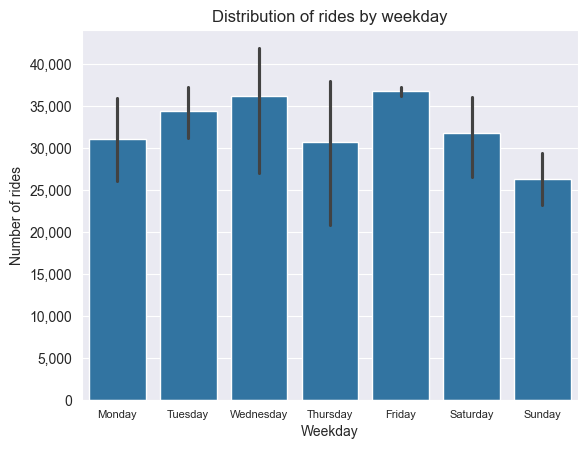

In [109]:
# Dictionnary to map each day_number to its corresponding day for better readability
day_mapping = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

weekday_grouping['day'] = weekday_grouping['day_number'].map(day_mapping)

weekday_graph = sns.barplot(data=weekday_grouping, x='day', y='count', errorbar='ci')
weekday_graph.set(xlabel='Weekday', ylabel='Number of rides')

sns.set_style('darkgrid')
plt.title('Distribution of rides by weekday')
plt.xticks(fontsize=8)
weekday_graph.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}')) # Setting a ',' thousands separator on y axis for better readability 

weekday_graph

### D. Usage/distance relation

Analyzing the popularity of ride routes based on the ride distance

List of stations and their coordinates

In [110]:
stations = file[['start_station_name', 'start_lat', 'start_lng']].groupby(by='start_station_name').min().reset_index()
stations.columns = ['station', 'lat', 'lng']
stations

,station,lat,lng
0,1 Ave & E 110 St,40.791825,-73.938463
1,1 Ave & E 16 St,40.731181,-73.982222
2,1 Ave & E 18 St,40.716762,-74.006262
3,1 Ave & E 30 St,40.741355,-73.975498
4,1 Ave & E 39 St,40.747038,-73.972185
...,...,...,...
1726,Wyckoff Ave & Cooper Ave,40.693380,-73.900736
1727,Wyckoff Ave & Gates Ave,40.699626,-73.912595
1728,Wyckoff St & 3 Ave,40.682691,-73.982776
1729,Wythe Ave & Metropolitan Ave,40.716732,-73.984673


List of 10 most popular ride routes

In [111]:
filtered_routes = file[file['start_station_name'] != file['end_station_name']] # Excluding routes where the start station and end station are the same
aggregation = filtered_routes.groupby(by=['start_station_name', 'end_station_name']).agg(count=('ride_id', 'count')).reset_index() # Number of rides for every route
top10 = aggregation.sort_values(by='count', ascending=False).head(10) # Retrieving the 10 first routes by number of rides

merged1 = top10.merge(stations, how='inner', left_on='start_station_name', right_on='station')
merged2 = merged1.merge(stations, how='inner', left_on='end_station_name', right_on='station', suffixes=('_start', '_end'))
routes = merged2[['start_station_name', 'end_station_name', 'count', 'lat_start', 'lng_start', 'lat_end', 'lng_end']]

routes

,start_station_name,end_station_name,count,lat_start,lng_start,lat_end,lng_end
0,St Marks Pl & 2 Ave,St Marks Pl & 1 Ave,414,40.728044,-73.987636,40.727545,-73.986277
1,N 6 St & Bedford Ave,S 4 St & Wythe Ave,343,40.717039,-73.960868,40.712800,-73.966672
2,McGuinness Blvd & Eagle St,Vernon Blvd & 50 Ave,335,40.726013,-73.952976,40.742212,-73.954370
3,Vernon Blvd & 50 Ave,Franklin St & Dupont St,314,40.742212,-73.954370,40.735401,-73.958825
4,W 22 St & 8 Ave,8 Ave & W 24 St,312,40.735577,-73.999781,40.745448,-73.998434
5,E 6 St & 2 Ave,1 Ave & E 6 St,311,40.726903,-73.988571,40.725802,-73.987596
6,Franklin St & Dupont St,Vernon Blvd & 50 Ave,304,40.735401,-73.958825,40.742212,-73.954370
7,Vernon Blvd & 50 Ave,McGuinness Blvd & Eagle St,295,40.742212,-73.954370,40.726013,-73.952976
8,E 2 St & Avenue C,E 1 St & 1 Ave,281,40.720646,-73.987344,40.723264,-73.990010
9,11 Ave & W 41 St,8 Ave & W 33 St,280,40.755626,-73.999372,40.741092,-74.001773


In [112]:
routes.dtypes

start_station_name     object
end_station_name       object
count                   int64
lat_start             float64
lng_start             float64
lat_end               float64
lng_end               float64
dtype: object

Distance calculation

In [113]:
def distance(start_lat, start_lng, end_lat, end_lng):

    apiKey = os.environ.get("GOOGLE_MAPS_API_KEY")

    url = 'https://routes.googleapis.com/directions/v2:computeRoutes'

    headers = {
    'Content-Type': 'application/json',
    'X-Goog-Api-Key': apiKey,
    'X-Goog-FieldMask': 'routes.duration,routes.distanceMeters,routes.polyline.encodedPolyline'
    }

    body = {
    "origin": {
        "location": {
        "latLng": {
            "latitude": start_lat,
            "longitude": start_lng
        }
        }
    },
    "destination": {
        "location": {
        "latLng": {
            "latitude": end_lat,
            "longitude": end_lng
        }
        }
    },
    "travelMode": "BICYCLE",
    "routingPreference": "ROUTING_PREFERENCE_UNSPECIFIED",
    "departureTime": "2024-10-15T15:01:23.045123456Z",
    "computeAlternativeRoutes": False,
    "routeModifiers": {
        "avoidTolls": False,
        "avoidHighways": False,
        "avoidFerries": False
    },
    "languageCode": "en-US",
    "units": "METRIC"
    }

    r = requests.post(url=url, headers=headers, json=body)
    response = r.json()
    result = response['routes'][0]['distanceMeters']
    return result

Adding the distance for each traval route

In [114]:
distances = []
for index, row in routes.iterrows():
    data = distance(row['lat_start'], row['lng_start'], row['lat_end'], row['lng_end'])
    distances.append(data)

routes.insert(7, column='distance', value=distances)
routes

,start_station_name,end_station_name,count,lat_start,lng_start,lat_end,lng_end,distance
0,St Marks Pl & 2 Ave,St Marks Pl & 1 Ave,414,40.728044,-73.987636,40.727545,-73.986277,127
1,N 6 St & Bedford Ave,S 4 St & Wythe Ave,343,40.717039,-73.960868,40.712800,-73.966672,855
2,McGuinness Blvd & Eagle St,Vernon Blvd & 50 Ave,335,40.726013,-73.952976,40.742212,-73.954370,2930
3,Vernon Blvd & 50 Ave,Franklin St & Dupont St,314,40.742212,-73.954370,40.735401,-73.958825,2028
4,W 22 St & 8 Ave,8 Ave & W 24 St,312,40.735577,-73.999781,40.745448,-73.998434,1262
5,E 6 St & 2 Ave,1 Ave & E 6 St,311,40.726903,-73.988571,40.725802,-73.987596,586
6,Franklin St & Dupont St,Vernon Blvd & 50 Ave,304,40.735401,-73.958825,40.742212,-73.954370,2016
7,Vernon Blvd & 50 Ave,McGuinness Blvd & Eagle St,295,40.742212,-73.954370,40.726013,-73.952976,2590
8,E 2 St & Avenue C,E 1 St & 1 Ave,281,40.720646,-73.987344,40.723264,-73.990010,753
9,11 Ave & W 41 St,8 Ave & W 33 St,280,40.755626,-73.999372,40.741092,-74.001773,2229


Scatterplot for the routes dataframe

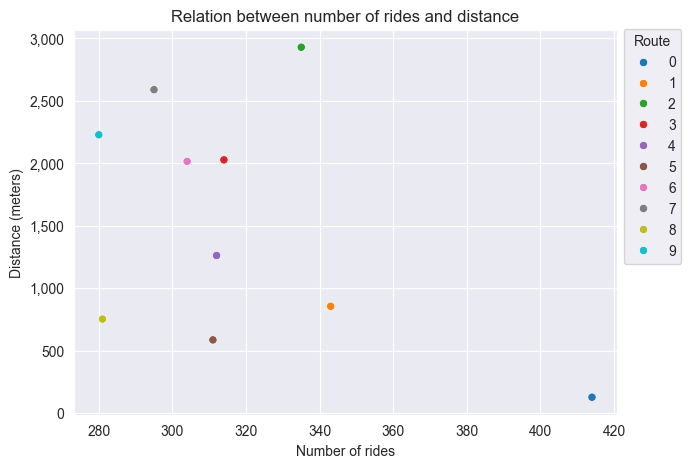

In [115]:
plt.figure(figsize=(7, 5))
plt.title('Relation between number of rides and distance')
plt.xlabel(xlabel='Number of rides')
plt.ylabel(ylabel='Distance (meters)')

routes_graph = sns.scatterplot(data=routes, x='count', y='distance', hue=routes.index, palette=sns.color_palette())

routes_graph.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}')) # Setting a ',' thousands separator on y axis for better readability
plt.legend(title='Route', bbox_to_anchor=(1, 1.02), loc='upper left')